# [빅데이터 처리1] - 5월 6일

In [1]:
import pandas as pd

In [2]:
pd.read_csv("playtennis.csv")   #playtennis.csv 읽어서 dataframe 리턴 

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [3]:
#윗내용 변수 담아주기 
tennis_data=pd.read_csv("playtennis.csv")  

In [4]:
tennis_data                                                              

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [5]:
#결과는 문자가 저장되어있는데 Decision TREE는 숫자가 젖아되있어야함;;; 
# 숫자로 바꿔주도록 하지 

In [6]:
### 방법 1

In [7]:
tennis_data.Outlook.replace("Sunny",0)                              #칸이름 (원래값 , 새값 ) 근데 기전 컬럼이 바뀐거 아니고 새로운 컬럼이 만들어짐!! 
                                                                 #기존 outlook은 그대로 있음. 

0            0
1            0
2     Overcast
3         Rain
4         Rain
5         Rain
6     Overcast
7            0
8            0
9         Rain
10           0
11    Overcast
12    Overcast
13        Rain
Name: Outlook, dtype: object

In [8]:
tennis_data.Outlook                                                    #진짜 그대로있네;;

0        Sunny
1        Sunny
2     Overcast
3         Rain
4         Rain
5         Rain
6     Overcast
7        Sunny
8        Sunny
9         Rain
10       Sunny
11    Overcast
12    Overcast
13        Rain
Name: Outlook, dtype: object

In [9]:
tennis_data.Outlook = tennis_data.Outlook.replace("Sunny",0)                        #덮어 씌워서 

In [10]:
import numpy as np
X = np.array(pd.DataFrame(tennis_data, columns = ['Outlook','Temperature','Humidity','Wind']))
y = np.array(pd.DataFrame(tennis_data),columns = ['playTennis'])

TypeError: 'columns' is an invalid keyword argument for array()

In [ ]:
### 방법 2

In [11]:
tennis_data.Outlook.replace("Overcast",1,inplace=True)                    #그냥 고치지 뭘.. 

In [12]:
tennis_data.Outlook

0        0
1        0
2        1
3     Rain
4     Rain
5     Rain
6        1
7        0
8        0
9     Rain
10       0
11       1
12       1
13    Rain
Name: Outlook, dtype: object

In [13]:
tennis_data["Outlook"].replace("Rain",2,inplace=True)

In [14]:
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,Hot,High,Weak,No
1,0,Hot,High,Strong,No
2,1,Hot,High,Weak,Yes
3,2,Mild,High,Weak,Yes
4,2,Cool,Normal,Weak,Yes
5,2,Cool,Normal,Strong,No
6,1,Cool,Normal,Strong,Yes
7,0,Mild,High,Weak,No
8,0,Cool,Normal,Weak,Yes
9,2,Mild,Normal,Weak,Yes


In [15]:
tennis_data.Temperature.replace("Hot",1,inplace=True)
tennis_data.Temperature.replace("Mild",2,inplace=True)
tennis_data.Temperature.replace("Cool",3,inplace=True)

In [16]:
tennis_data.Humidity.replace("High",1,inplace=True)
tennis_data.Humidity.replace("Normal",2,inplace=True)

In [17]:
tennis_data.Wind.replace("Weak",1,inplace=True)
tennis_data.Wind.replace("Strong",2,inplace=True)

In [18]:
tennis_data.PlayTennis.replace("No",1,inplace=True)
tennis_data.PlayTennis.replace("Yes",2,inplace=True)

In [19]:
tennis_data

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,1,1,1,1
1,0,1,1,2,1
2,1,1,1,1,2
3,2,2,1,1,2
4,2,3,2,1,2
5,2,3,2,2,1
6,1,3,2,2,2
7,0,2,1,1,1
8,0,3,2,1,2
9,2,2,2,1,2


In [20]:
#decision tree만들어주기

In [21]:
tennis_data.loc[ : , "Outlook" : "Wind"]

,Outlook,Temperature,Humidity,Wind
0,0,1,1,1
1,0,1,1,2
2,1,1,1,1
3,2,2,1,1
4,2,3,2,1
5,2,3,2,2
6,1,3,2,2
7,0,2,1,1
8,0,3,2,1
9,2,2,2,1


In [22]:
X = tennis_data.loc[ : , "Outlook" : "Wind"]       #독립변수들로 지정

In [23]:
Y = tennis_data[["PlayTennis"]]                     #종속변수로 column 가져오기

In [24]:
Y                                                

,PlayTennis
0,1
1,1
2,2
3,2
4,2
5,1
6,2
7,1
8,2
9,2


In [25]:
y = tennis_data["PlayTennis"]      

In [26]:
y                                               #시리즈로 나옴 

0     1
1     1
2     2
3     2
4     2
5     1
6     2
7     1
8     2
9     2
10    2
11    2
12    2
13    1
Name: PlayTennis, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
train_test_split(X,y,test_size=0.2)          #독립변수X 80% -> 독립변수20% ->종속변수y 80%-> 종속변수20% 

[    Outlook  Temperature  Humidity  Wind
 8         0            3         2     1
 7         0            2         1     1
 3         2            2         1     1
 6         1            3         2     2
 4         2            3         2     1
 12        1            1         2     1
 0         0            1         1     1
 2         1            1         1     1
 10        0            2         2     2
 11        1            2         1     2
 9         2            2         2     1,
     Outlook  Temperature  Humidity  Wind
 5         2            3         2     2
 13        2            2         1     2
 1         0            1         1     2,
 8     2
 7     1
 3     2
 6     2
 4     2
 12    2
 0     1
 2     2
 10    2
 11    2
 9     2
 Name: PlayTennis, dtype: int64,
 5     1
 13    1
 1     1
 Name: PlayTennis, dtype: int64]

In [29]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
dt_clf = DecisionTreeClassifier()   #Decision Tree 만들 객체 생성 .. 그럼 대체 언제만들어줘? fit()

In [33]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [34]:
dt_prediction = dt_clf.predict(X_test)

In [35]:
dt_prediction

array([2, 1, 1], dtype=int64)

In [36]:
y_test 

2    2
1    1
7    1
Name: PlayTennis, dtype: int64

In [37]:
y_train

6     2
4     2
12    2
10    2
3     2
5     1
11    2
8     2
0     1
13    1
9     2
Name: PlayTennis, dtype: int64

In [38]:
#정확도 보기 
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,dt_prediction)
print("정확도:",accuracy)

정확도: 1.0


### 트리 시각화 p.69 

In [39]:
! pip install pydotplus

In [40]:
! pip install graphviz

In [41]:
from sklearn import tree

In [42]:
dt_dot_data = tree.export_graphviz(
                    dt_clf,
                    feature_names = ["Outlook","Temperature","Humidity","Wind"],
                    class_names = ["No","Yes"]           #주의할것은 
)

In [43]:
dt_dot_data

'digraph Tree {\nnode [shape=box] ;\n0 [label="Humidity <= 1.5\\ngini = 0.397\\nsamples = 11\\nvalue = [3, 8]\\nclass = Yes"] ;\n1 [label="Outlook <= 0.5\\ngini = 0.5\\nsamples = 4\\nvalue = [2, 2]\\nclass = No"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]\\nclass = No"] ;\n1 -> 2 ;\n3 [label="Wind <= 1.5\\ngini = 0.444\\nsamples = 3\\nvalue = [1, 2]\\nclass = Yes"] ;\n1 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]\\nclass = Yes"] ;\n3 -> 4 ;\n5 [label="Outlook <= 1.5\\ngini = 0.5\\nsamples = 2\\nvalue = [1, 1]\\nclass = No"] ;\n3 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]\\nclass = Yes"] ;\n5 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]\\nclass = No"] ;\n5 -> 7 ;\n8 [label="Outlook <= 1.5\\ngini = 0.245\\nsamples = 7\\nvalue = [1, 6]\\nclass = Yes"] ;\n0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n9 [label="gini = 0.0\\nsamples = 4\\nvalue = [0, 4

In [44]:
import pydotplus 

In [45]:
pydotplus.graph_from_dot_data(dt_dot_data).create_png()

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02O\x00\x00\x02\xe0\x08\x06\x00\x00\x00\x8d\x8d\x93U\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xdd\x7f|S\xf5\xbd?\xf0\xd7\x81"Nd\r\xeaZ\x15,\xdc\xcd\x95q\xf7\xa3^w\xaf\x16\xb7\xaf\\\xcb\x10\xa8;a^\xdb\xd2\xa8\xb8\x87\x1b\xf4\x9enp\x15\xe9\x1eCM\xd7i\xebt\x9a:\xef`\xb6K\xd8\xf6\xc0z\x9b\xb4e:\x1b\x01\x7f\xd0\xba\xb2]Zq\x9b\xc9&\xf2h\x99\xccDp&\xf3G"\xce\x81\x80\x9f\xef\x1f\xbd\xe7\x98\xb4I\x9b\xa4IN~\xbc\x9e\x8fG\x1em\xce\xf9\x9cs\xde\'\xf9\xb4y\xe7\xf3\xf9\x9c\xcf\x91\x84\x10\x02DDDD\x14\x8b\x9eizG@DDD\x94M\x98<\x11\x11\x11\x11\xc5\x81\xc9\x13\x11\x11\x11Q\x1c\n\xf4\x0e\x80(\x9f\x1c9r\x04\xfb\xf6\xed\xd3;\x0c\xca\x01W\\q\x05\xe6\xcd\x9b\xa7w\x18Dy\x89\xc9\x13Q\x1a\xed\xdb\xb7\x0f\xabW\xaf\xd6;\x0c\xca\x01]]]\xa8\xa9\xa9\xd1;\x0c\xa2\xbc\xc4\xe4\x89H\x07\xbc\xc8\x95\xa6B\x92$\xbdC \xcak\x1c\xf3DDDD\x14\x07&ODDDDq`\xf2DDDD\x14\x07&ODDDDq`\xf2DDDD\x14\x07&ODDDDq`\xf2DDqillDcc\xe3\x84e\xfc~?\x1c\x0e\

In [46]:
data = pydotplus.graph_from_dot_data(dt_dot_data).create_png()

In [47]:
data

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02O\x00\x00\x02\xe0\x08\x06\x00\x00\x00\x8d\x8d\x93U\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xdd\x7f|S\xf5\xbd?\xf0\xd7\x81"Nd\r\xeaZ\x15,\xdc\xcd\x95q\xf7\xa3^w\xaf\x16\xb7\xaf\\\xcb\x10\xa8;a^\xdb\xd2\xa8\xb8\x87\x1b\xf4\x9enp\x15\xe9\x1eCM\xd7i\xebt\x9a:\xef`\xb6K\xd8\xf6\xc0z\x9b\xb4e:\x1b\x01\x7f\xd0\xba\xb2]Zq\x9b\xc9&\xf2h\x99\xccDp&\xf3G"\xce\x81\x80\x9f\xef\x1f\xbd\xe7\x98\xb4I\x9b\xa4IN~\xbc\x9e\x8fG\x1em\xce\xf9\x9cs\xde\'\xf9\xb4y\xe7\xf3\xf9\x9c\xcf\x91\x84\x10\x02DDDD\x14\x8b\x9eizG@DDD\x94M\x98<\x11\x11\x11\x11\xc5\x81\xc9\x13\x11\x11\x11Q\x1c\n\xf4\x0e\x80(\x9f\x1c9r\x04\xfb\xf6\xed\xd3;\x0c\xca\x01W\\q\x05\xe6\xcd\x9b\xa7w\x18Dy\x89\xc9\x13Q\x1a\xed\xdb\xb7\x0f\xabW\xaf\xd6;\x0c\xca\x01]]]\xa8\xa9\xa9\xd1;\x0c\xa2\xbc\xc4\xe4\x89H\x07\xbc\xc8\x95\xa6B\x92$\xbdC \xcak\x1c\xf3DDDD\x14\x07&ODDDDq`\xf2DDDD\x14\x07&ODDDDq`\xf2DDDD\x14\x07&ODDDDq`\xf2DDqillDcc\xe3\x84e\xfc~?\x1c\x0e\

In [48]:
from io import BytesIO

In [49]:
from PIL import Image

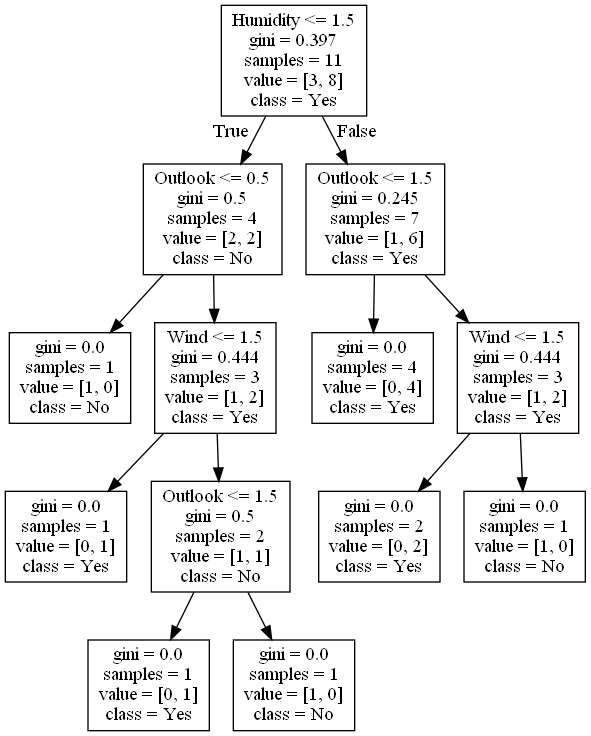

In [50]:
Image.open(BytesIO(data))